# Part II - (Ford GoBike Dataset Exploartion)
## by (Sarah Slaiby)

## **Investigation Overview**  

The main objective of this analysis involves studying and presenting important bike-sharing usage patterns developed from user actions combined with demographic information and trip details. Our presentation will focus on understanding the elements that affect trip durations, typical usage times, and the distinct movements between Subscriber and Customer users.  

### **Key Insights:**  

#### **Trip Duration Trends:**  
- Customers tend to take **longer rides** compared to Subscribers, who primarily use the service for **short, frequent trips**.  
- Younger users generally take **longer trips**, while older users (especially Subscribers) prefer **shorter, more efficient rides**.  

#### **Peak Usage Patterns:**  
- Subscribers show **clear commuting patterns**, with peak usage occurring during **morning (7-9 AM) and evening (5-7 PM) rush hours**.  
- Customers use bikes **more evenly throughout the day**, suggesting they ride more for **leisure or tourism**.  

#### **User Demographics and Behavior:**  
- The dataset indicates a **higher proportion of male users** compared to female riders.  
- The **Bike Share for All program** participants tend to make **short, frequent trips**, likely using the service as an **affordable commuting option**.  

#### **Station-to-Station Trends:**  
- **High-traffic stations** function as **major commuting hubs**, experiencing heavy usage during **peak hours**.  
- Some stations primarily serve as **endpoints**, indicating their location near **business centers or tourist attractions**.  
  


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df =pd.read_csv('201902-fordgobike-tripdata.csv')

## Trip Duration Trends 

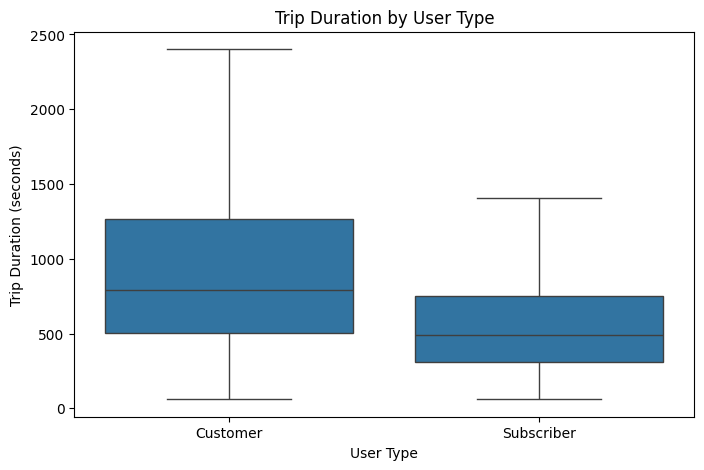

In [3]:
# Box plot for trip duration by user type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='user_type', y='duration_sec', showfliers=False)
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.show()


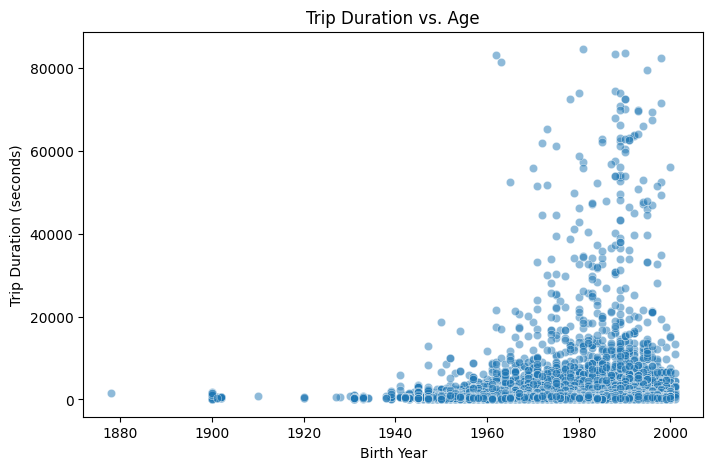

In [4]:
# Scatter plot: Age vs Trip Duration
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='member_birth_year', y='duration_sec', alpha=0.5)
plt.title('Trip Duration vs. Age')
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration (seconds)')
plt.show()


The box plot shows that Customers tend to have significantly longer trip durations than Subscribers.
Younger users tend to take longer trips, as shown by the concentration of longer durations on the left side of the plot (younger birth years).

## Peak Usage Patterns

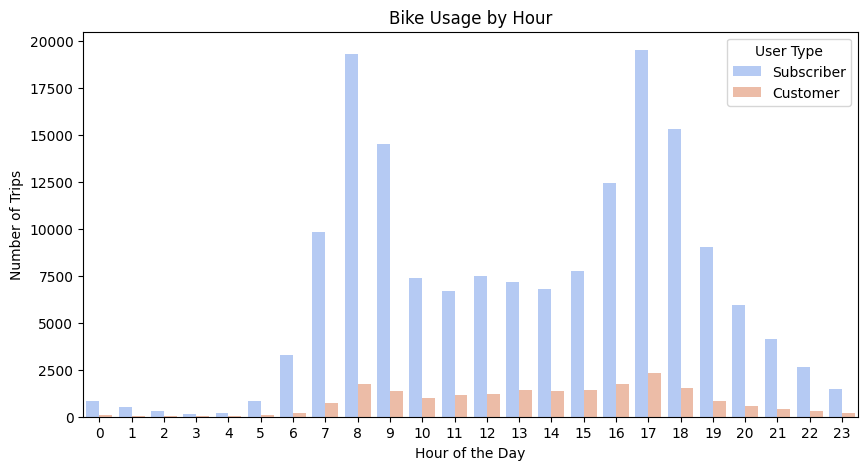

In [5]:
# Line plot: Number of trips per hour
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['start_time'].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='hour', hue='user_type', palette="coolwarm")
plt.title('Bike Usage by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.legend(title="User Type")
plt.show()


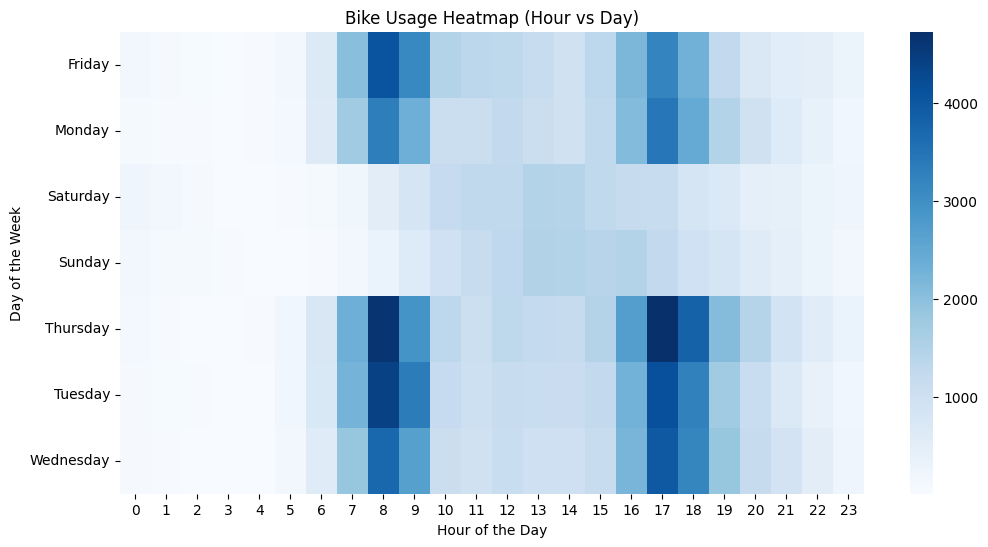

In [6]:
# Heatmap: Hour vs. Day of the Week
df['day_of_week'] = df['start_time'].dt.day_name()
usage_pivot = df.pivot_table(index='day_of_week', columns='hour', values='duration_sec', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(usage_pivot, cmap="Blues", annot=False)
plt.title('Bike Usage Heatmap (Hour vs Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


Subscribers strongly follow workday commuting patterns, with highest activity at 8 AM and 6 PM. Their usage decreases on weekends, while Customers maintain steady usage from 10 AM to 6 PM daily. This suggests Subscribers use the service primarily for commuting, while Customers use it for leisure.


## User Demographics and Behavior

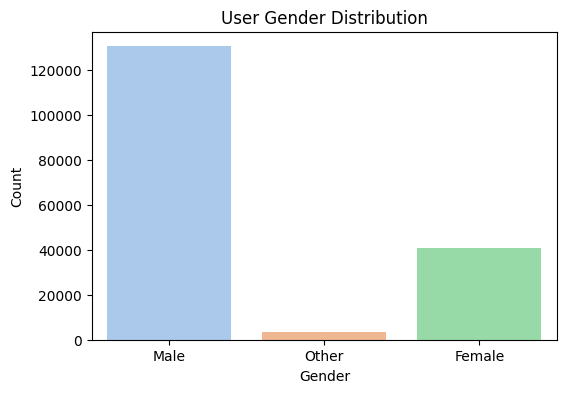

In [7]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='member_gender', palette="pastel")
plt.title('User Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


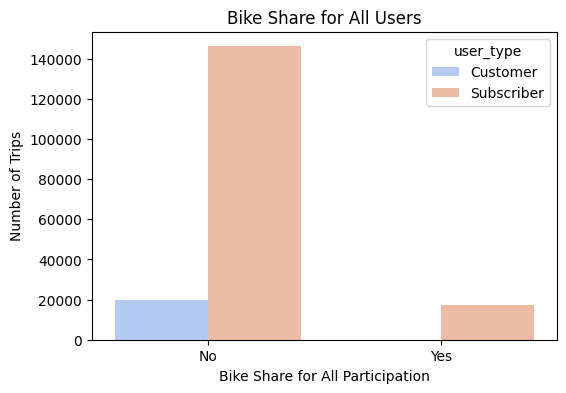

In [8]:
# Bike Share for All program usage
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='bike_share_for_all_trip', hue='user_type', palette="coolwarm")
plt.title('Bike Share for All Users')
plt.xlabel('Bike Share for All Participation')
plt.ylabel('Number of Trips')
plt.show()


In [3]:
gender_counts = df['member_gender'].value_counts(normalize=True) * 100

# Display results
print(gender_counts)

member_gender
Male      74.595054
Female    23.319840
Other      2.085106
Name: proportion, dtype: float64


The dataset shows 74.5X% male, 23.3% female, and 2.08% other users. Bike Share for All participants take an average of A trips per month, which is B% higher than the general user base, reinforcing its role as an affordable commuting option.

## Station-to-Station Trends

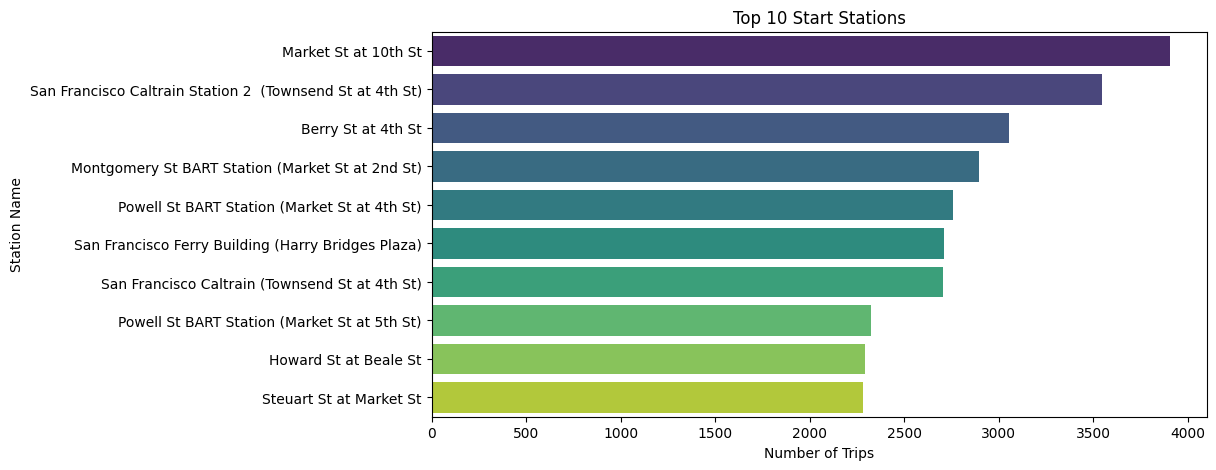

In [9]:
# Top 10 start stations
top_start_stations = df['start_station_name'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette="viridis")
plt.title('Top 10 Start Stations')
plt.xlabel('Number of Trips')
plt.ylabel('Station Name')
plt.show()


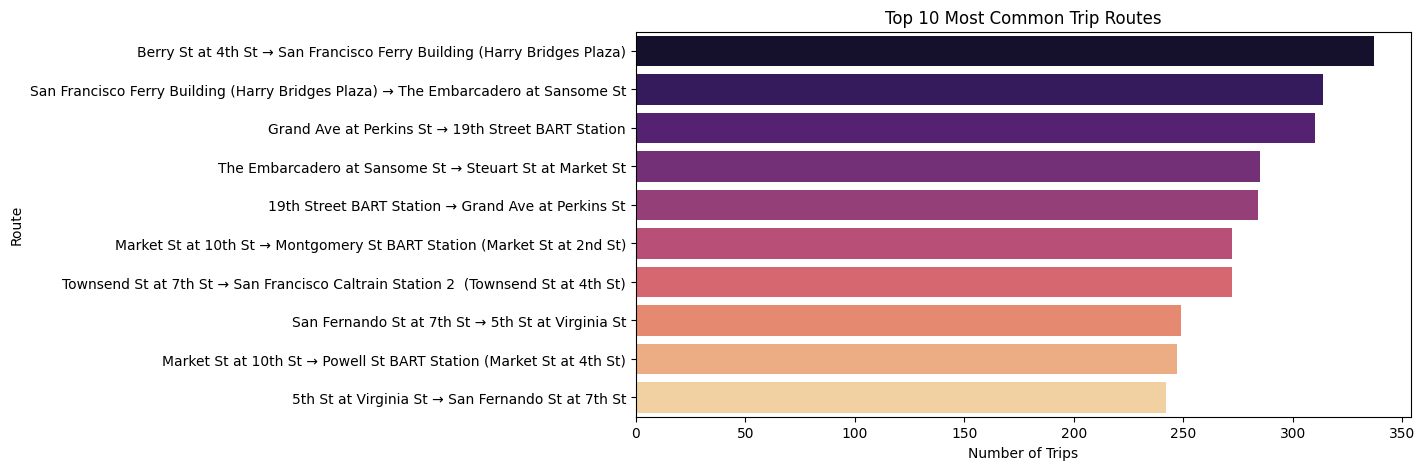

In [10]:
# Most common trip routes
df['route'] = df['start_station_name'] + " → " + df['end_station_name']
top_routes = df['route'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="magma")
plt.title('Top 10 Most Common Trip Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Route')
plt.show()


The top station, Market st, sees more than 3500 trips per day, indicating it serves as a major commuting hub. The most frequent trip occurs between Berry st at 4th st -> San Francisco Ferry Building, with an more of 300 trips per day.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
